In [1]:
!pip install -q kaggle

In [2]:
from getpass import getpass
import os
user = 'aya25hassan'
key = '90e6ead9472ce545a5494f7ec775ed57'

if '.kaggle' not in os.listdir('/root'):
    !mkdir -p ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!chmod 777 *

In [4]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 125MB/s]


In [5]:
!unzip nlp-getting-started.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import nltk 
nltk.download("all")
from nltk.tokenize import word_tokenize
# from nltk import SyllableTokenizer
# tk = SyllableTokenizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [7]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
train_df["keyword"].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [10]:
train_df["location"].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [11]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [12]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


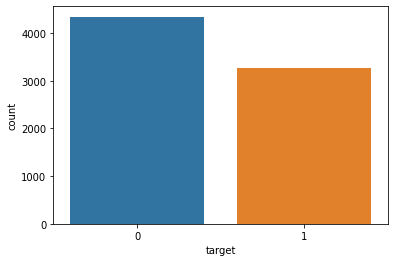

In [13]:
import seaborn as sns
sns.countplot(train_df["target"])

### Remove Punctuations

In [14]:
import string
string.punctuation

def remove_punctuation(text):
  without_punctuation ="".join([i for i in text if i not in string.punctuation])
  return without_punctuation

# train_df['text_without_pun']= train_df['text'].apply(lambda x:remove_punctuation(x))
# train_df.head()

### Remove Noise
which include :
- Links
- HTML tags
- numbers

In [15]:
import re
def remove_noise(text):
  url = re.compile(r"https?://\S+|www\.\S+")
  tag = re.compile(r'<.*?>')
  nums = re.compile(r'\d+')
  clean_text = url.sub(r'',text)
  clean_text = tag.sub(r'',clean_text)
  clean_text = nums.sub(r'',clean_text)
  return clean_text
# train_df["text_without_noise"] = train_df["text_without_pun"].apply(lambda x: remove_noise(x))
# train_df["text_without_noise"]

### Convert To Lower Case

In [16]:
def lower_case(text):
  return text.lower()
# train_df["text_without_noise"] = train_df["text_without_noise"].apply(lambda x: lower_case(x))
# train_df.head()

### Tokenize Text

In [17]:
import re
def tokenization(text):
  tokens = re.split('W+',text)
  return tokens
# train_df["tokens"] = train_df["text_without_pun"].apply(lambda x: tokenization(x))
# train_df["tokens"]

In [18]:
text = "hello from the other side"
word_tokenize(text)
tokenization(text)

['hello from the other side']

In [19]:
# train_df["tokens"] = train_df["text_without_pun"].apply(lambda x: word_tokenize(x))
# train_df["tokens"]

### Remove Stop Words

In [20]:
eng_stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  not_stopword = [i for i in text  if i not in eng_stopwords]
  return not_stopword

# train_df["tokens_without_SW"] = train_df["tokens"].apply(lambda x:remove_stopwords(x))
# train_df["tokens_without_SW"]

### Stemming

In [21]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
  stemmed_tokens = [porter_stemmer.stem(token) for token in text]
  return stemmed_tokens

# train_df["stemmed_tokens"] = train_df['tokens_without_SW'].apply(lambda x: stemming(x))

### Lemmatization 

In [22]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizing(text):
  lemmatized_tokens = [wordnet_lemmatizer.lemmatize(token) for token in text]
  return lemmatized_tokens

# train_df["clean_tokens"] = train_df["stemmed_tokens"].apply(lambda x: lemmatizing(x))
# train_df["clean_tokens"]

## Preprocessing Function

In [23]:
def preprocessing_data(text):
  lower_text = lower_case(remove_noise(remove_punctuation(text)))
  tokens = lemmatizing(stemming(remove_stopwords(word_tokenize(lower_text))))
  return tokens

In [24]:
train_df["tokens"] = train_df["text"].apply(lambda x:preprocessing_data(x))
test_df["tokens"] = test_df["text"].apply(lambda x:preprocessing_data(x))
train_df["tokens"]

0        [deed, reason, earthquak, may, allah, forgiv, u]
1            [forest, fire, near, la, rong, sask, canada]
2       [resid, ask, shelter, place, notifi, offic, ev...
3       [peopl, receiv, wildfir, evacu, order, califor...
4       [got, sent, photo, rubi, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, hold, bridg, collaps, near...
7609    [ariaahrari, thetawniest, control, wild, fire,...
7610           [utckm, volcano, hawaii, httptcozdtoydebj]
7611    [polic, investig, ebik, collid, car, littl, po...
7612    [latest, home, raze, northern, california, wil...
Name: tokens, Length: 7613, dtype: object

## Spliting Data

In [33]:
from sklearn.model_selection import train_test_split
features = train_df['tokens']
label = train_df['target']
x_train, x_val, y_train, y_val = train_test_split(features,label,shuffle = True,test_size=0.2,random_state=42)

## Bag Of Words BoW

In [46]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer 
tok = Tokenizer(num_words=2000, oov_token='UNK')
tok.fit_on_texts(x_train)
x_train_bow = tok.texts_to_matrix(x_train)
x_val_bow = tok.texts_to_matrix(x_val)
x_train_bow

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [27]:
print("Train Shape = ",x_train_bow.shape)
print("Val Shape = ",x_val_bow.shape)

Train Shape =  (6090, 1000)
Val Shape =  (1523, 1000)


### TF/IDF

In [69]:
tok.fit_on_texts(x_train)
x_train_seq = tok.texts_to_sequences(x_train)
x_val_seq = tok.texts_to_sequences(x_val)
x_train_seq

[[1, 1, 1, 75, 84, 187, 8, 78, 1012, 231, 1551, 1, 1],
 [1, 1, 1, 484, 1277, 1, 1, 1, 341, 127, 1],
 [342, 1, 1, 1, 1552, 1553, 7, 1013, 354, 110, 1403, 258, 5, 73, 1],
 [602, 1088, 355, 808, 323, 867, 249, 1, 1173, 1],
 [1787, 419, 374, 5, 304, 396, 1788, 1, 1],
 [259, 540, 136, 116, 232, 61, 142, 33, 1],
 [1, 1, 21, 260, 100, 809, 1, 1278, 1],
 [1, 188, 1, 20, 1554, 1, 1, 758, 632, 61, 868, 1],
 [1, 485, 420, 343, 23, 869, 571, 1],
 [1, 4, 147, 1, 603, 658, 1, 870, 83, 74, 421],
 [13, 759, 223, 1, 290, 143, 1555, 1, 422],
 [1, 1556, 1, 61, 61, 1557, 1, 375, 1089, 200, 1174, 1],
 [1279, 939, 1175, 1789, 1, 397, 1],
 [1, 1, 871, 356, 1280, 1014, 486, 1, 119, 96, 487, 518, 1],
 [189, 28, 137, 398, 1, 32, 305, 760, 423, 1, 1, 1],
 [1, 572, 573, 150, 376, 7, 67, 1090, 1],
 [1, 1, 725, 190, 151, 182, 761, 1091, 1, 138, 4, 96, 128, 424],
 [183, 1, 115, 1, 1, 9, 1],
 [124, 324, 188, 91, 1, 152, 260, 269, 1558, 1],
 [1, 1, 1, 1, 940, 1, 940, 1559, 1, 1, 1, 1],
 [872, 79, 1790, 11, 488],
 [62,

Convert Test To Vectors

In [35]:
y_train = np.array(y_train).astype('float32')
y_val = np.array(y_val).astype('float32')

# Models With BoW

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 2000
training_padded = pad_sequences(x_train_bow,
                                maxlen=maxlen, 
                                truncating='post',
                                padding = 'post')
val_padded = pad_sequences(x_val_bow,
                                maxlen=maxlen, 
                                truncating='post',
                                padding = 'post')


In [65]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Embedding(1000, 32, input_length=maxlen))
model.add(layers.LSTM(32))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 2000, 32)          32000     
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 flatten_7 (Flatten)         (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 64)                2112      
                                                      

In [56]:
history = model.fit(
    training_padded, 
    y_train, 
    epochs = 15, 
    batch_size = 512,  
    validation_data=(val_padded, y_val)
)

Epoch 1/15
10/10 [==============================] - 4s 166ms/step - loss: 0.6917 - binary_accuracy: 0.5567 - val_loss: 0.6909 - val_binary_accuracy: 0.5616
Epoch 2/15
10/10 [==============================] - 1s 110ms/step - loss: 0.6894 - binary_accuracy: 0.5698 - val_loss: 0.6888 - val_binary_accuracy: 0.5616
Epoch 3/15
10/10 [==============================] - 1s 111ms/step - loss: 0.6872 - binary_accuracy: 0.5716 - val_loss: 0.6873 - val_binary_accuracy: 0.5616
Epoch 4/15
10/10 [==============================] - 1s 109ms/step - loss: 0.6860 - binary_accuracy: 0.5712 - val_loss: 0.6863 - val_binary_accuracy: 0.5616
Epoch 5/15
10/10 [==============================] - 1s 110ms/step - loss: 0.6839 - binary_accuracy: 0.5722 - val_loss: 0.6857 - val_binary_accuracy: 0.5616
Epoch 6/15
10/10 [==============================] - 1s 109ms/step - loss: 0.6834 - binary_accuracy: 0.5708 - val_loss: 0.6856 - val_binary_accuracy: 0.5616
Epoch 7/15
10/10 [==============================] - 1s 108ms/ste

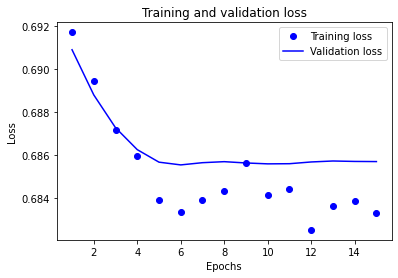

In [57]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## GRU

In [58]:
model = models.Sequential()
model.add(layers.Embedding(1000, 32, input_length=maxlen))
model.add(layers.GRU(32))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 2000, 32)          32000     
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                      

In [59]:
history = model.fit(
    training_padded, 
    y_train, 
    epochs = 15, 
    batch_size = 512,  
    validation_data=(val_padded, y_val)
)

Epoch 1/15
10/10 [==============================] - 4s 163ms/step - loss: 0.6915 - binary_accuracy: 0.5686 - val_loss: 0.6891 - val_binary_accuracy: 0.5616
Epoch 2/15
10/10 [==============================] - 1s 111ms/step - loss: 0.6880 - binary_accuracy: 0.5712 - val_loss: 0.6870 - val_binary_accuracy: 0.5616
Epoch 3/15
10/10 [==============================] - 1s 110ms/step - loss: 0.6853 - binary_accuracy: 0.5714 - val_loss: 0.6859 - val_binary_accuracy: 0.5616
Epoch 4/15
10/10 [==============================] - 1s 110ms/step - loss: 0.6845 - binary_accuracy: 0.5714 - val_loss: 0.6856 - val_binary_accuracy: 0.5616
Epoch 5/15
10/10 [==============================] - 1s 111ms/step - loss: 0.6847 - binary_accuracy: 0.5714 - val_loss: 0.6857 - val_binary_accuracy: 0.5616
Epoch 6/15
10/10 [==============================] - 1s 112ms/step - loss: 0.6838 - binary_accuracy: 0.5712 - val_loss: 0.6858 - val_binary_accuracy: 0.5616
Epoch 7/15
10/10 [==============================] - 1s 111ms/ste

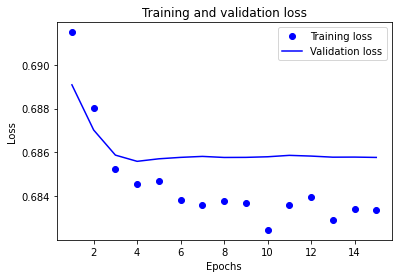

In [60]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## BiLSTM

In [66]:
model = models.Sequential()
model.add(layers.Embedding(1000, 32, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 2000, 32)          32000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 64)               

In [67]:
history = model.fit(
    training_padded, 
    y_train, 
    epochs = 15, 
    batch_size = 512,  
    validation_data=(val_padded, y_val)
)

Epoch 1/15
12/12 [==============================] - 7s 285ms/step - loss: 0.6899 - binary_accuracy: 0.5488 - val_loss: 0.6870 - val_binary_accuracy: 0.5739
Epoch 2/15
12/12 [==============================] - 2s 210ms/step - loss: 0.6853 - binary_accuracy: 0.5665 - val_loss: 0.6842 - val_binary_accuracy: 0.5739
Epoch 3/15
12/12 [==============================] - 3s 211ms/step - loss: 0.6838 - binary_accuracy: 0.5688 - val_loss: 0.6830 - val_binary_accuracy: 0.5739
Epoch 4/15
12/12 [==============================] - 3s 211ms/step - loss: 0.6828 - binary_accuracy: 0.5680 - val_loss: 0.6827 - val_binary_accuracy: 0.5739
Epoch 5/15
12/12 [==============================] - 3s 212ms/step - loss: 0.6815 - binary_accuracy: 0.5685 - val_loss: 0.6826 - val_binary_accuracy: 0.5739
Epoch 6/15
12/12 [==============================] - 3s 211ms/step - loss: 0.6815 - binary_accuracy: 0.5691 - val_loss: 0.6826 - val_binary_accuracy: 0.5739
Epoch 7/15
12/12 [==============================] - 3s 211ms/ste

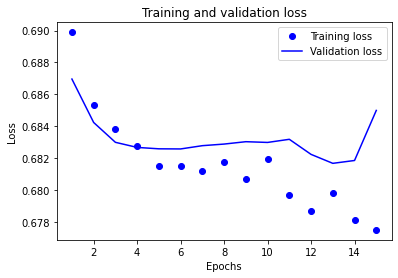

In [68]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Models With TF/IDF

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 2000
training_padded = pad_sequences(x_train_seq,
                                maxlen=maxlen, 
                                truncating='post',
                                padding = 'post')
val_padded = pad_sequences(x_val_seq,
                                maxlen=maxlen, 
                                truncating='post',
                                padding = 'post')

## LSTM

In [71]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Embedding(1000, 32, input_length=maxlen))
model.add(layers.LSTM(32))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 2000, 32)          32000     
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 flatten_9 (Flatten)         (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                      

In [72]:
history = model.fit(
    training_padded, 
    y_train, 
    epochs = 15, 
    batch_size = 512,  
    validation_data=(val_padded, y_val)
)

Epoch 1/15
12/12 [==============================] - 4s 155ms/step - loss: 0.6907 - binary_accuracy: 0.5683 - val_loss: 0.6875 - val_binary_accuracy: 0.5739
Epoch 2/15
12/12 [==============================] - 1s 110ms/step - loss: 0.6866 - binary_accuracy: 0.5695 - val_loss: 0.6846 - val_binary_accuracy: 0.5739
Epoch 3/15
12/12 [==============================] - 1s 110ms/step - loss: 0.6853 - binary_accuracy: 0.5695 - val_loss: 0.6830 - val_binary_accuracy: 0.5739
Epoch 4/15
12/12 [==============================] - 1s 112ms/step - loss: 0.6841 - binary_accuracy: 0.5695 - val_loss: 0.6825 - val_binary_accuracy: 0.5739
Epoch 5/15
12/12 [==============================] - 1s 116ms/step - loss: 0.6841 - binary_accuracy: 0.5695 - val_loss: 0.6824 - val_binary_accuracy: 0.5739
Epoch 6/15
12/12 [==============================] - 1s 110ms/step - loss: 0.6838 - binary_accuracy: 0.5695 - val_loss: 0.6823 - val_binary_accuracy: 0.5739
Epoch 7/15
12/12 [==============================] - 1s 110ms/ste

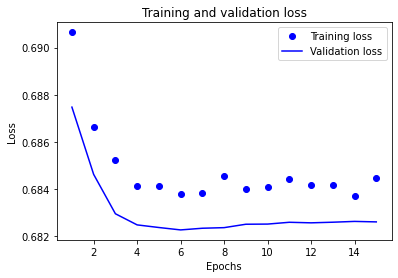

In [73]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## GRU

In [74]:
model = models.Sequential()
model.add(layers.Embedding(1000, 32, input_length=maxlen))
model.add(layers.GRU(32))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 2000, 32)          32000     
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 batch_normalization_10 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 32)                0         
                                                                 
 flatten_10 (Flatten)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 64)                2112      
                                                     

In [75]:
history = model.fit(
    training_padded, 
    y_train, 
    epochs = 15, 
    batch_size = 512,  
    validation_data=(val_padded, y_val)
)

Epoch 1/15
12/12 [==============================] - 6s 210ms/step - loss: 0.6910 - binary_accuracy: 0.5622 - val_loss: 0.6884 - val_binary_accuracy: 0.5739
Epoch 2/15
12/12 [==============================] - 1s 112ms/step - loss: 0.6874 - binary_accuracy: 0.5700 - val_loss: 0.6849 - val_binary_accuracy: 0.5739
Epoch 3/15
12/12 [==============================] - 1s 111ms/step - loss: 0.6857 - binary_accuracy: 0.5693 - val_loss: 0.6831 - val_binary_accuracy: 0.5739
Epoch 4/15
12/12 [==============================] - 1s 109ms/step - loss: 0.6846 - binary_accuracy: 0.5693 - val_loss: 0.6825 - val_binary_accuracy: 0.5739
Epoch 5/15
12/12 [==============================] - 1s 110ms/step - loss: 0.6843 - binary_accuracy: 0.5695 - val_loss: 0.6823 - val_binary_accuracy: 0.5739
Epoch 6/15
12/12 [==============================] - 1s 111ms/step - loss: 0.6846 - binary_accuracy: 0.5695 - val_loss: 0.6824 - val_binary_accuracy: 0.5739
Epoch 7/15
12/12 [==============================] - 1s 110ms/ste

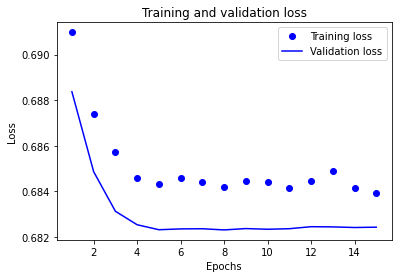

In [76]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## BiLSTM

In [77]:
model = models.Sequential()
model.add(layers.Embedding(1000, 32, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer='Adamax',
    metrics=[metrics.binary_accuracy]
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 2000, 32)          32000     
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 64)              

In [78]:
history = model.fit(
    training_padded, 
    y_train, 
    epochs = 15, 
    batch_size = 512,  
    validation_data=(val_padded, y_val)
)

Epoch 1/15
12/12 [==============================] - 7s 285ms/step - loss: 0.6984 - binary_accuracy: 0.5133 - val_loss: 0.6886 - val_binary_accuracy: 0.5739
Epoch 2/15
12/12 [==============================] - 3s 212ms/step - loss: 0.6794 - binary_accuracy: 0.5690 - val_loss: 0.6855 - val_binary_accuracy: 0.5739
Epoch 3/15
12/12 [==============================] - 3s 212ms/step - loss: 0.6579 - binary_accuracy: 0.6161 - val_loss: 0.6822 - val_binary_accuracy: 0.5739
Epoch 4/15
12/12 [==============================] - 3s 212ms/step - loss: 0.6336 - binary_accuracy: 0.6580 - val_loss: 0.6778 - val_binary_accuracy: 0.5739
Epoch 5/15
12/12 [==============================] - 3s 212ms/step - loss: 0.6035 - binary_accuracy: 0.6865 - val_loss: 0.6725 - val_binary_accuracy: 0.5739
Epoch 6/15
12/12 [==============================] - 3s 212ms/step - loss: 0.5594 - binary_accuracy: 0.7348 - val_loss: 0.6658 - val_binary_accuracy: 0.5739
Epoch 7/15
12/12 [==============================] - 3s 246ms/ste

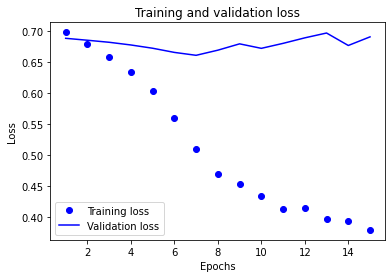

In [79]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()